In [1]:
# Import required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

# Section 6 : Regression by Grid Search

Consider the function , $$f(\textbf{x},\Theta) = \theta_1 x_1^2 + \theta_2 x_2$$
to be fitted to the "dataset4.npz". Assume that an initial solution to this function is already obtained by Gradient descent, it is found to $\Theta_0 = (1, 4)^T$. Perform grid search in a suitable neighbourhood of this point and precisely estimate $\Theta$.

In [2]:
x1 = np.load('dataset4.npz')['x1']
x2 = np.load('dataset4.npz')['x2']
y = np.load('dataset4.npz')['y']

#Construct a uniform grid
grid_0 = [];grid_1 = []
step = 0.01
for d in range(-100,101):
    grid_0.append(1+d*step)
    grid_1.append(4+d*step)

# Perform search
theta1 = 0;theta2 = 0
Jmin = float('inf')
for i in grid_0:
    for j in grid_1:
        func_val = i*x1**2 + j*x2
        diff = func_val-y
        diff_sq = diff**2
        cost = sum(diff_sq)
        if(cost<Jmin):
            Jmin=cost
            theta1=i
            theta2=j
print('theta 1:',theta1,'theta 2:',theta2)

theta 1: 1.57 theta 2: 3.78


# Section 7 : Linear Regression with Sklearn

Four Main Assumptions:
1. Linear relationship between features and target,
2. Homoscedasticity: The variance of residual is the same for any value of X,
3. Independence: Observations are independent of each other,
3. No multi-collinearity among features i.e features are indepent

**General Note : Attributes and parameters should be chosen according to the question asked** 

In [3]:
# For performing regression operations
from sklearn.linear_model import LinearRegression # Fitting the linear regression
from sklearn.preprocessing import PolynomialFeatures # To convert the features into polynomial features
from sklearn.metrics import mean_squared_error # This is our cost function a.k.a loss function

### 7.1. Importing Dataset and Visualisation

1) Import the data X and y from the **"dataset2.npz"** 

2) Print the the top 10 rows of X and y. and Scattter plot of X and y

Values of X are: [[10.]
 [-4.]
 [ 4.]
 [ 8.]
 [-8.]
 [ 6.]
 [ 0.]
 [-6.]
 [-2.]
 [ 2.]] 
 and values of y are: [[137.30104493]
 [ 30.27196401]
 [ 41.39087638]
 [100.52268636]
 [ 73.17271168]
 [ 70.65513882]
 [ 12.58840376]
 [ 40.1882022 ]
 [  7.03865692]
 [ 31.62571764]]


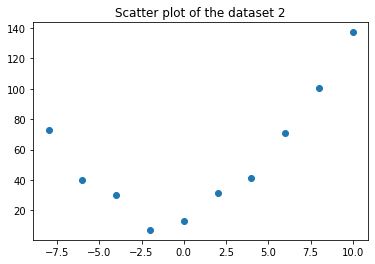

In [4]:
X=np.reshape(np.load('dataset2.npz')['x'],(-1,1))
y=np.reshape(np.load('dataset2.npz')['y'],(-1,1))
print('Values of X are:',X,'\n and values of y are:',y)
#plotting the scatter plot.
plt.scatter(X,y)
plt.title('Scatter plot of the dataset 2')
plt.show()

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

### 7.2. Degree 1 (Linear)

3) Using linear regression, find a relation between $Y$ and $X$. Plot the regrssion function(vs $X$) and report the mean square error.

Mean Square Error:  977.1734445909718


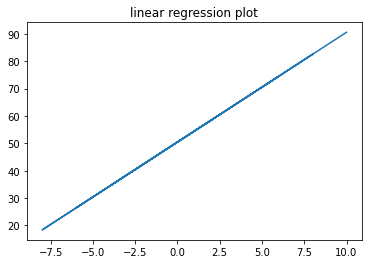

In [5]:
X_linear=PolynomialFeatures(1).fit_transform(X)
Linear_reg=LinearRegression().fit(X_linear,y)
print('Mean Square Error: ',mean_squared_error(y,Linear_reg.predict(X_linear)))
plt.plot(X,Linear_reg.predict(X_linear))
plt.title('linear regression plot')
plt.show()

### 7.3. Degree 2 (Quadratic)

3) Using polynomial regression of degree 2, Find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

Mean Square Error:  24.84633172780818


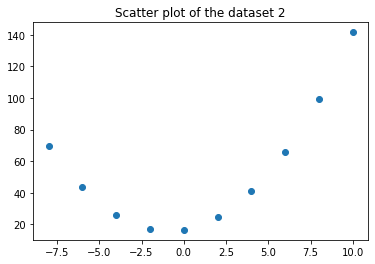

In [6]:
X_quad=PolynomialFeatures(2).fit_transform(X)
Quad_reg=LinearRegression().fit(X_quad,y)
print('Mean Square Error: ',mean_squared_error(y,Quad_reg.predict(X_quad)))
plt.scatter(X,Quad_reg.predict(X_quad))
plt.title('Scatter plot of the dataset 2')
plt.show()

### 7.4. Degree 3 (Cubic)

4) Using polynomial regression of degree 3, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error

Mean Square Error:  16.26492228044507


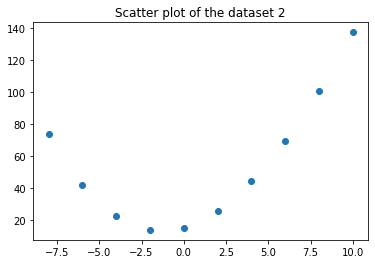

In [7]:
X_cubic=PolynomialFeatures(3).fit_transform(X)
cubic_reg=LinearRegression().fit(X_cubic,y)
print('Mean Square Error: ',mean_squared_error(y,cubic_reg.predict(X_cubic)))
plt.scatter(X,cubic_reg.predict(X_cubic))
plt.title('Scatter plot of the dataset 2')
plt.show()

### 7.5. Degree 9

5) Using polynomial regression of degree 9, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

Mean Square Error:  7.586223321917308e-13


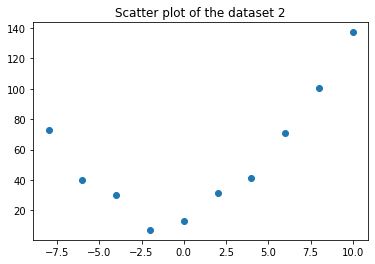

In [8]:
X_pow9=PolynomialFeatures(9).fit_transform(X)
pow9_reg=LinearRegression().fit(X_pow9,y)
print('Mean Square Error: ',mean_squared_error(y,pow9_reg.predict(X_pow9)))
plt.scatter(X,pow9_reg.predict(X_pow9))
plt.title('Scatter plot of the dataset 2')
plt.show()

### 7.6. Training Error

6) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data based on MSE of training error

**Note** : Degree 0 means just the intercept

degree: 0 Training error: 1507.9821577240077
degree: 1 Training error: 977.1734445909718
degree: 2 Training error: 24.84633172780818
degree: 3 Training error: 16.26492228044507
degree: 4 Training error: 16.0313637043996
degree: 5 Training error: 15.356207903504545
degree: 6 Training error: 15.222226925850197
degree: 7 Training error: 9.477956239307598
degree: 8 Training error: 0.48986163334690247
degree: 9 Training error: 7.586223321917308e-13


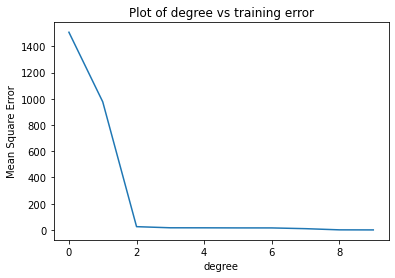

Based on the training error the best degree of the polynomial is 9


In [9]:
train_MSE_arr=[]
id_arr=[1]*10
for i in range(10):
    X_d=PolynomialFeatures(i).fit_transform(X)
    reg=LinearRegression().fit(X_d,y)
    train_MSE_arr.append(mean_squared_error(y,reg.predict(X_d)))
    id_arr[i]*=i
    print('degree:',i,'Training error:',train_MSE_arr[i])
plt.plot(id_arr,train_MSE_arr)
plt.title('Plot of degree vs training error');plt.xlabel('degree');plt.ylabel('Mean Square Error')
plt.show()
print('Based on the training error the best degree of the polynomial is 9')

### 7.7. Test error

Load **'dataset2_test.npz'**. The data points in the file are from the same distribution as the ones in 'dataset2.npz'.

7) Plot the mean square error by predicting outputs on the test dataset using the trained models of degrees 0,1,...9 obtained with the training data set **dataset2.npz**. Now, comment on the best model for data based on MSE on both training and test datasets.

(Hint: Plot Training error and Testing error in the same plot.) Use Matplotlib for plotting

degree: 0 Training error: 6885.185185185185
degree: 1 Training error: 6518.518518518519
degree: 2 Training error: 3.1936244886967443e-27
degree: 3 Training error: 3.771752247140636e-25
degree: 4 Training error: 1.3408556898044124e-23
degree: 5 Training error: 7.211012395966393e-22
degree: 6 Training error: 9.645266764231931e-20
degree: 7 Training error: 6.106002810394942e-16
degree: 8 Training error: 1.8102226132764797e-13
degree: 9 Training error: 1.2853842390917425e-11


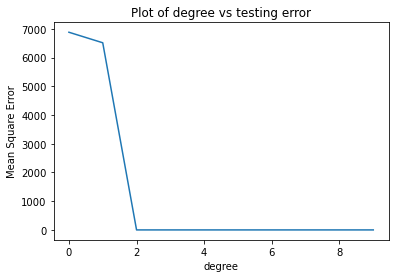

In [10]:
X_test=np.reshape(np.load('dataset2_test.npz')['x'],(-1,1))
y_test=np.reshape(np.load('dataset2_test.npz')['y'],(-1,1))

test_MSE_arr=[]
id_arr=[1]*10
for i in range(10):
    X_d=PolynomialFeatures(i).fit_transform(X_test)
    reg=LinearRegression().fit(X_d,y_test)
    test_MSE_arr.append(mean_squared_error(y_test,reg.predict(X_d)))
    id_arr[i]*=i
    print('degree:',i,'Training error:',test_MSE_arr[i])
plt.plot(id_arr,test_MSE_arr)
plt.title('Plot of degree vs testing error');plt.xlabel('degree');plt.ylabel('Mean Square Error')
plt.show()

### 7.8. Best Degree of polynomial

8)Hint : Based on Test error.

In [11]:
print('Based on the test error the best degree of the polynomial is 2')

Based on the test error the best degree of the polynomial is 2


# Section 8 : Multiple Linear Regression on Boston Housing Price Data
Import data from **"dataset3.csv"**. This is one among the sklearn standard datasets which can be used to develop a model for house price prediction "load_boston". Description of the features can be found in the sklearn documentation if you want to explore.

## 8.1. Describe the data
Hint :  Categorical features = ['RAD', 'CHAS', 'ZN'], Non-categorical features = Except categorical all the other features
1. Find Mean, Median for Non-categorical features and Price, Mode only for Categorical feaures
2. Find Quantiles at 25th, 50th, 75th for Non-categorical features and Price
3. Find Maximum and Minimum, Range of the data (max -min) for Non-categorical features and Price
4. Find Distributions (Histogram) for Non-categorical features and Price (Using Seaborn is suggested)

**Note** - Dont use pandas.describe here. You may use inbuilt functions from numpy package. You can store the above descriptive statistics in a dataframe and print that dataframe.

In [12]:
dataset3 = pd.read_csv('dataset3.csv')

dframe = []
columns = ['Statistic','CRIM','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT','Price']

temp = []
for i in range(12):
    if i==0:temp.append('Mean')
    else:temp.append(dataset3[columns[i]].mean())
dframe.append(temp)

temp = []
for i in range(12):
    if i==0:temp.append('Median')
    else:temp.append(dataset3[columns[i]].median())
dframe.append(temp)

temp = []
for i in range(12):
    if i==0:temp.append('Maximum')
    else:temp.append(dataset3[columns[i]].max())
dframe.append(temp)

temp = []
for i in range(12):
    if i==0:temp.append('Minimum')
    else:temp.append(dataset3[columns[i]].min())
dframe.append(temp)

temp = []
for i in range(12):
    if i==0:temp.append('Range')
    else:temp.append(dataset3[columns[i]].max() - dataset3[columns[i]].min())
dframe.append(temp)

temp = []
for i in range(12):
    if i==0:temp.append('25th Quartile')
    else:temp.append(np.percentile(dataset3[columns[i]],25))
dframe.append(temp)

temp = []
for i in range(12):
    if i==0:temp.append('50th Quartile')
    else:temp.append(np.percentile(dataset3[columns[i]],50))
dframe.append(temp)

temp = []
for i in range(12):
    if i==0:temp.append('75th Quartile')
    else:temp.append(np.percentile(dataset3[columns[i]],75))
dframe.append(temp)

df = pd.DataFrame(dframe, columns = columns)
df

,Statistic,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
0,Mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
1,Median,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
2,Maximum,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000
3,Minimum,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
4,Range,88.969880,27.280000,0.486000,5.219000,97.100000,10.996900,524.000000,9.400000,396.580000,36.240000,45.000000
5,25th Quartile,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
6,50th Quartile,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
7,75th Quartile,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000


## 8.2. Correlation Heatmap for all the features and target
**Hint** : Use Seaborn library to plot, note keep annotate = True

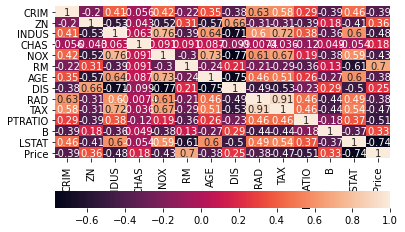

In [13]:
sns.heatmap(dataset3.corr(),annot=True, cbar_kws= {'orientation': 'horizontal'})

## 8.3. Highly Correlated features
Find and print the highly correlated features with respect to "Price". 

In [14]:
dataset3.corr()['Price'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
Price      1.000000
Name: Price, dtype: float64

## 8.4. Split the Dataset
**Hint** : Use sklearn train_test_split to split the data into train and test data, keep random state = 2020 and test_size = 0.33

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset3.drop(columns='Price'),dataset3['Price'],random_state=2020,test_size=0.33)

## 8.5. Train the model on only train data using linear_regression
Report Train MSE

In [16]:
Linear_reg=LinearRegression().fit(X_train,y_train)
print('Mean Square Training Error: ',mean_squared_error(y_train,Linear_reg.predict(X_train)))

Mean Square Training Error:  22.166423224150183


## 8.6. Predict Outputs for Test Data
Report test MSE

In [17]:
preds=Linear_reg.predict(X_test)
print('Mean Square Test Error: ',mean_squared_error(y_test,Linear_reg.predict(X_test)))

Mean Square Test Error:  22.004861555354665


## 8.7. Important Features
Find and print the featuers in order of their importance based on trained regression model.

In [18]:
print('The features in the order of their feature importance are:')
sorted(zip(Linear_reg.coef_,dataset3.drop(columns='Price').columns))

The features in the order of their feature importance are:


[(-15.350205070037463, 'NOX'),
 (-1.4572466577091798, 'DIS'),
 (-0.8973395536597112, 'PTRATIO'),
 (-0.5033925016622712, 'LSTAT'),
 (-0.11816110248914681, 'CRIM'),
 (-0.010967233578216024, 'TAX'),
 (-0.009923097960607809, 'AGE'),
 (0.009015996347172612, 'B'),
 (0.015564575713466273, 'INDUS'),
 (0.04457986492060938, 'ZN'),
 (0.29718324090549963, 'RAD'),
 (3.472599302386993, 'CHAS'),
 (4.326126576372002, 'RM')]

# Q&A Section :
1. Comment on assumptions validity discussed in Section 7 with this dataset? Whether we satisfied assumptions or not.
2. Is there any relation between highly important features(from Section 8.7) and highly correlated features with price?Only give descriptive observation.
3. Why usually test error is higher than training error?
4. Will Analytical solution discussed in the Notebook 1 Section 2 be valid on this dataset? Why or Why not?

1. The assunmption regarding linear realtionhip between features & target is not true. The Mean squared error is fairly high after fitting the data. As we saw in the correlation map, the features are not independent.
 
2.  Not all the features look related, but some top features come in the order of correlation to Price.

3. Training error is low because we train the model for multiple epochs on the training data. So the model has seen the data repeatedly many times. But test data is new.

4. The analytical solution is always valid. We use it or not is depending on size of the dataset and the number of features in it.